# Exploratory data analysis on Terrorism

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = 'globalterrorismdb_0718dist.csv'

try:
    df = pd.read_csv(df, encoding='utf-8')
except UnicodeDecodeError:
    df = pd.read_csv(df, encoding='latin1')


C:\Users\91929\AppData\Local\Temp\ipykernel_9772\1518203117.py:6: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(df, encoding='latin1')


In [4]:
df

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN


In [5]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [6]:
df.shape

(181691, 135)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [8]:
df.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,...,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,...,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,...,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,11.510046,4.545640e+00,1.000000,...,0.000000e+00,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,31.467463,4.324651e+01,1.000000,...,1.500000e+04,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.685087,6.871033e+01,1.000000,...,4.000000e+05,0.000000e+00,1.273412e+03,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,1.793667e+02,5.000000,...,1.000000e+09,1.320000e+08,2.750000e+08,48000.000000,7.000000,2769.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
df.duplicated().sum()

0

In [12]:
df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','provstate':'State',
                       'region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed',
                       'nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type',
                       'weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)

In [13]:
Terrorism_data=df[['Year','Month','Day','Country','state','Region','city','latitude','longitude','AttackType','Killed',
               'Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]

In [15]:
Terrorism_data

,Year,Month,Day,Country,state,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,2017,12,31,Somalia,Middle Shebelle,Sub-Saharan Africa,Ceelka Geelow,2.359673,45.385034,Armed Assault,1.0,2.0,Checkpoint,12/31/2017: Assailants opened fire on a Somali...,Al-Shabaab,Military,Firearms,NaN
181687,2017,12,31,Syria,Lattakia,Middle East & North Africa,Jableh,35.407278,35.942679,Bombing/Explosion,2.0,7.0,Hmeymim Air Base,12/31/2017: Assailants launched mortars at the...,Muslim extremists,Military,Explosives,NaN
181688,2017,12,31,Philippines,Maguindanao,Southeast Asia,Kubentog,6.900742,124.437908,Facility/Infrastructure Attack,0.0,0.0,Houses,12/31/2017: Assailants set fire to houses in K...,Bangsamoro Islamic Freedom Movement (BIFM),Private Citizens & Property,Incendiary,NaN
181689,2017,12,31,India,Manipur,South Asia,Imphal,24.798346,93.940430,Bombing/Explosion,0.0,0.0,Office,12/31/2017: Assailants threw a grenade at a Fo...,Unknown,Government (General),Explosives,NaN


In [16]:
df.duplicated().sum()

0

### most asked typical question:

In [25]:
print("Most Attack Types:",Terrorism_data['AttackType'].value_counts().idxmax())
print("Most attack country:",Terrorism_data['Country'].value_counts().idxmax())
print("Most attacks city:",Terrorism_data['city'].value_counts().index[1]) #as first entry is 'unknown'
print("Most attacks Region:",Terrorism_data['Region'].value_counts().idxmax())
print("Most attacks year:",Terrorism_data['Year'].value_counts().idxmax())
print("Most attacks by Group:",Terrorism_data['Group'].value_counts().index[1])


Most Attack Types: Bombing/Explosion
Most attack country: Iraq
Most attacks city: Baghdad
Most attacks Region: Middle East & North Africa
Most attacks year: 2014
Most attacks by Group: Taliban


In [26]:
Terrorism_data.columns

Index(['Year', 'Month', 'Day', 'Country', 'state', 'Region', 'city',
       'latitude', 'longitude', 'AttackType', 'Killed', 'Wounded', 'Target',
       'Summary', 'Group', 'Target_type', 'Weapon_type', 'Motive'],
      dtype='object')

In [52]:
top_cities = Terrorism_data['city'].value_counts()[:10]
top_cities

city
Unknown         9775
Baghdad         7589
Karachi         2652
Lima            2359
Mosul           2265
Belfast         2171
Santiago        1621
Mogadishu       1581
San Salvador    1558
Istanbul        1048
Name: count, dtype: int64

## Data visualization

TIME SERIES ANALYSIS

C:\Users\91929\AppData\Local\Temp\ipykernel_9772\3881385453.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Terrorism_data['Date'] = pd.to_datetime(Terrorism_data[['Year', 'Month', 'Day']], errors='coerce')


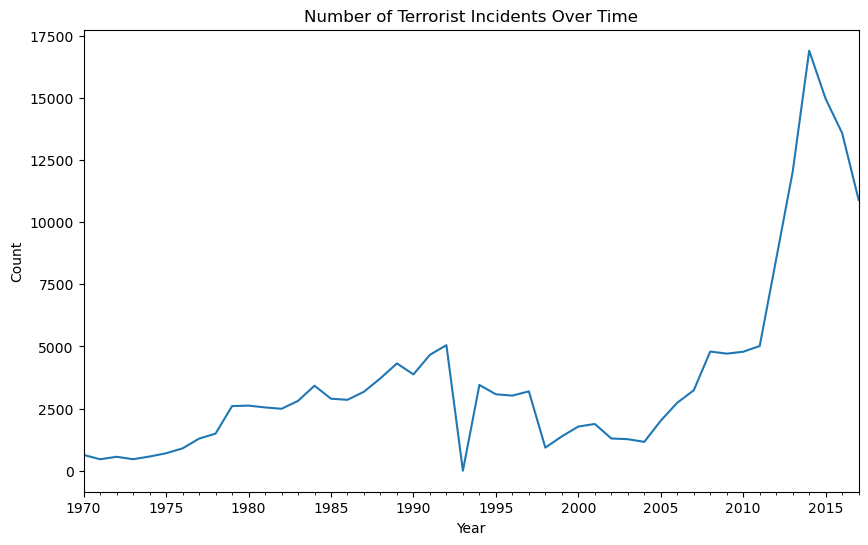

In [58]:
Terrorism_data['Date'] = pd.to_datetime(Terrorism_data[['Year', 'Month', 'Day']], errors='coerce')
Terrorism_data.set_index('Date', inplace=True)
plt.figure(figsize=(10, 6))
Terrorism_data.resample('Y').size().plot(title='Number of Terrorist Incidents Over Time')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

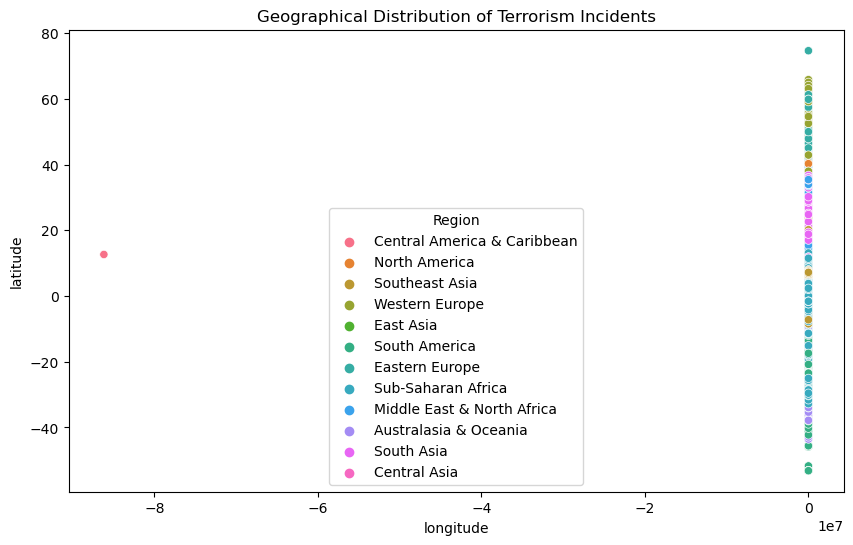

In [59]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='longitude', y='latitude', hue='Region', data=Terrorism_data)
plt.title('Geographical Distribution of Terrorism Incidents')
plt.show()

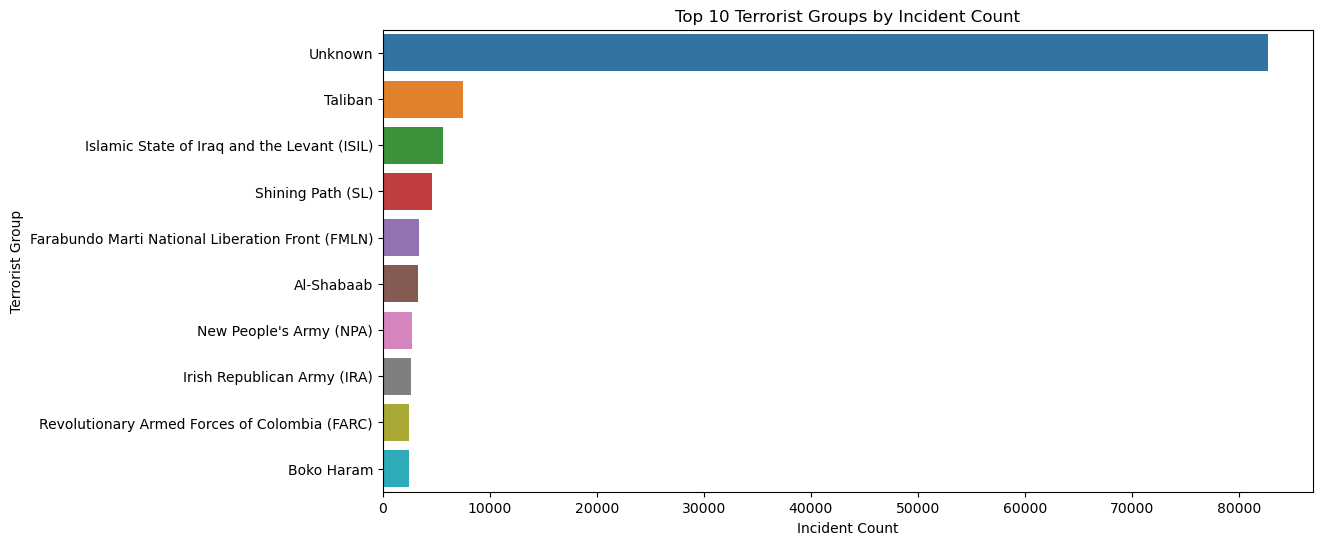

In [31]:
plt.figure(figsize=(12, 6))
group_counts = Terrorism_data['Group'].value_counts()[:10]
sns.barplot(x=group_counts.values, y=group_counts.index, orient='h')
plt.title('Top 10 Terrorist Groups by Incident Count')
plt.xlabel('Incident Count')
plt.ylabel('Terrorist Group')
plt.show()

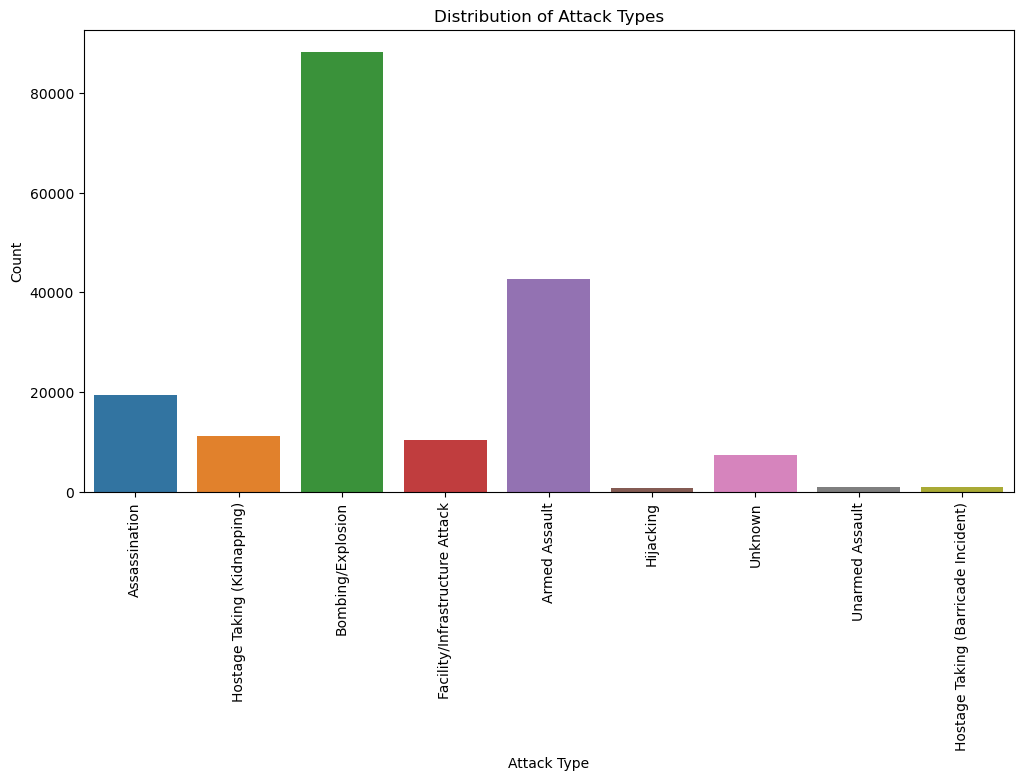

In [32]:
plt.figure(figsize=(12, 6))
sns.countplot(x='AttackType', data=Terrorism_data)
plt.title('Distribution of Attack Types')
plt.xticks(rotation=90)
plt.xlabel('Attack Type')
plt.ylabel('Count')
plt.show()

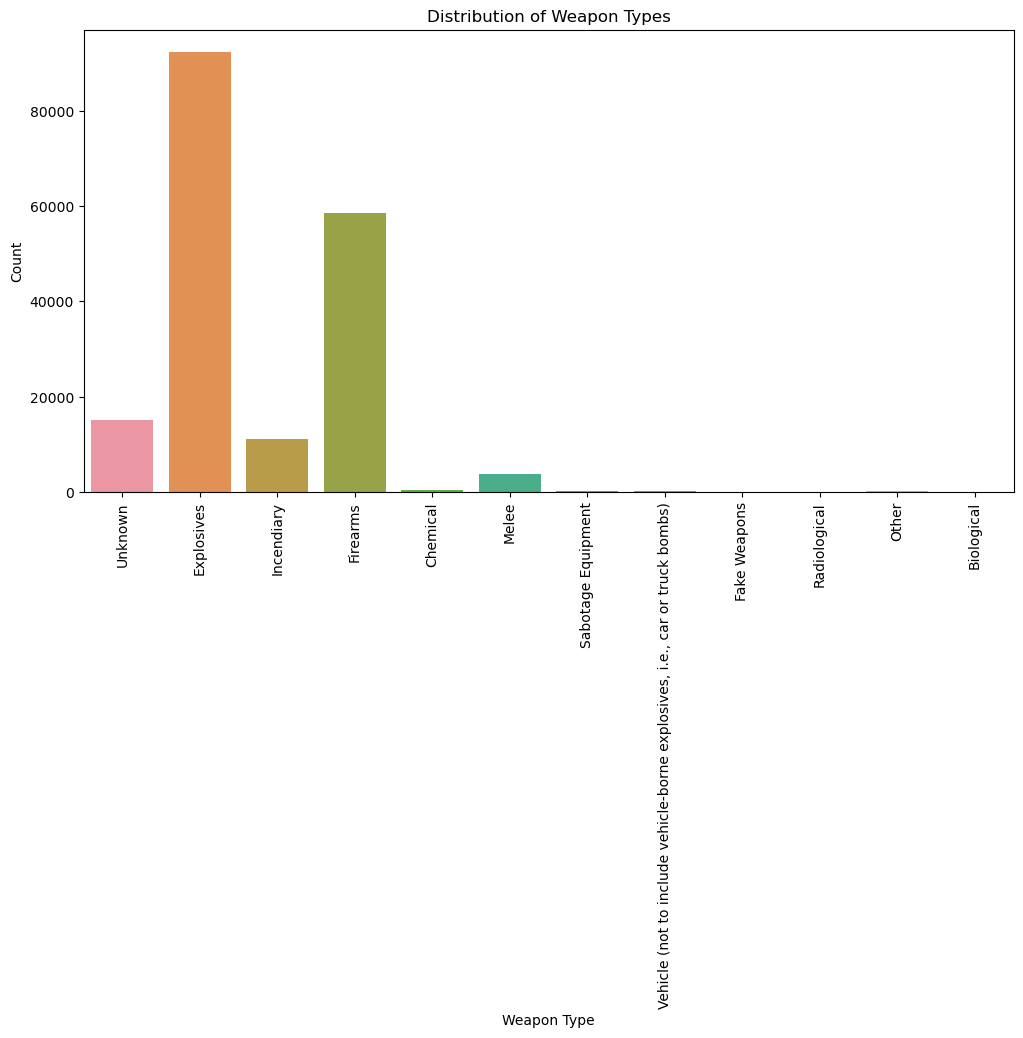

In [33]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Weapon_type', data=Terrorism_data)
plt.title('Distribution of Weapon Types')
plt.xticks(rotation=90)
plt.xlabel('Weapon Type')
plt.ylabel('Count')
plt.show()

 Cross-Tabulations

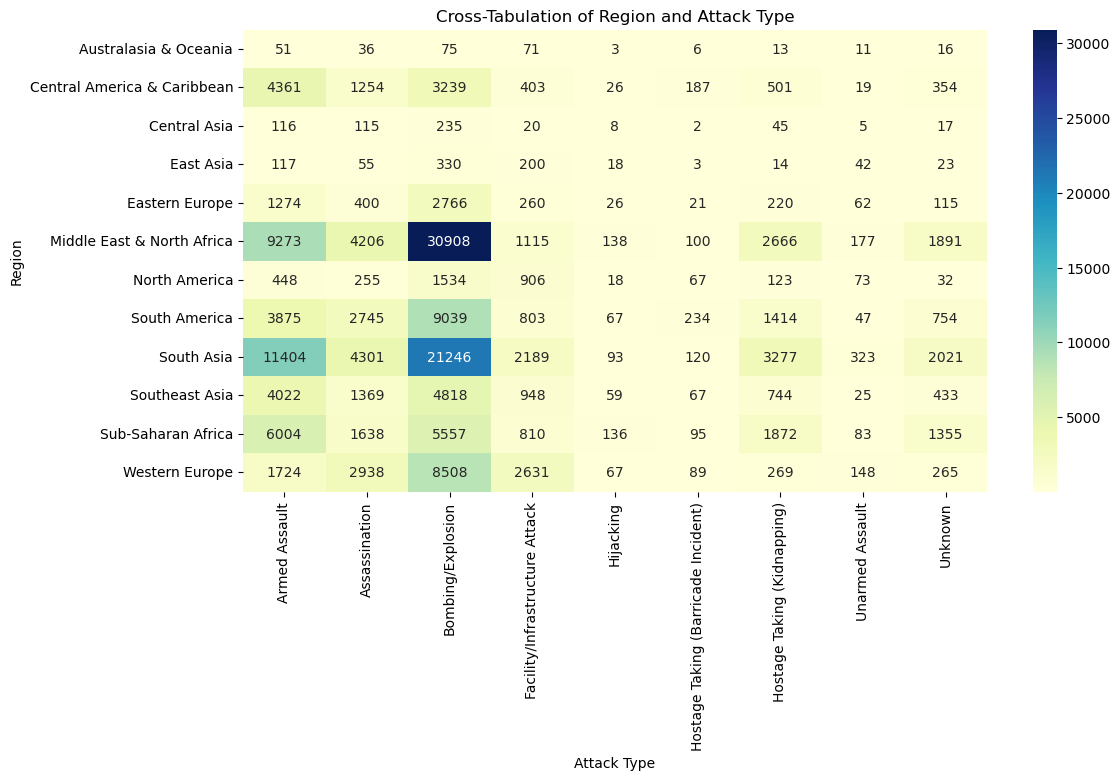

In [35]:
cross_tab = pd.crosstab(Terrorism_data['Region'], Terrorism_data['AttackType'])
plt.figure(figsize=(12, 6))
sns.heatmap(cross_tab, cmap='YlGnBu', annot=True, fmt='d')
plt.title('Cross-Tabulation of Region and Attack Type')
plt.xlabel('Attack Type')
plt.ylabel('Region')
plt.show()

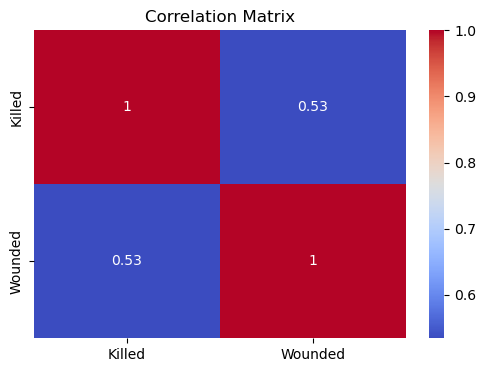

In [36]:
correlation_matrix = Terrorism_data[['Killed', 'Wounded']].corr()
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

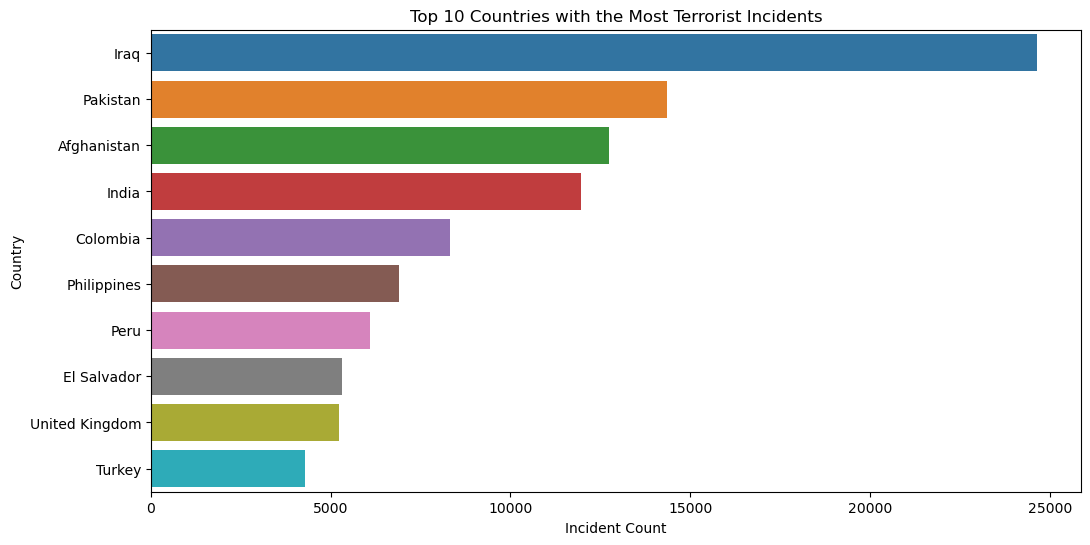

In [38]:
plt.figure(figsize=(12, 6))
top_countries = Terrorism_data['Country'].value_counts()[:10]
sns.barplot(x=top_countries.values, y=top_countries.index, orient='h')
plt.title('Top 10 Countries with the Most Terrorist Incidents')
plt.xlabel('Incident Count')
plt.ylabel('Country')
plt.show()

State-wise incident count

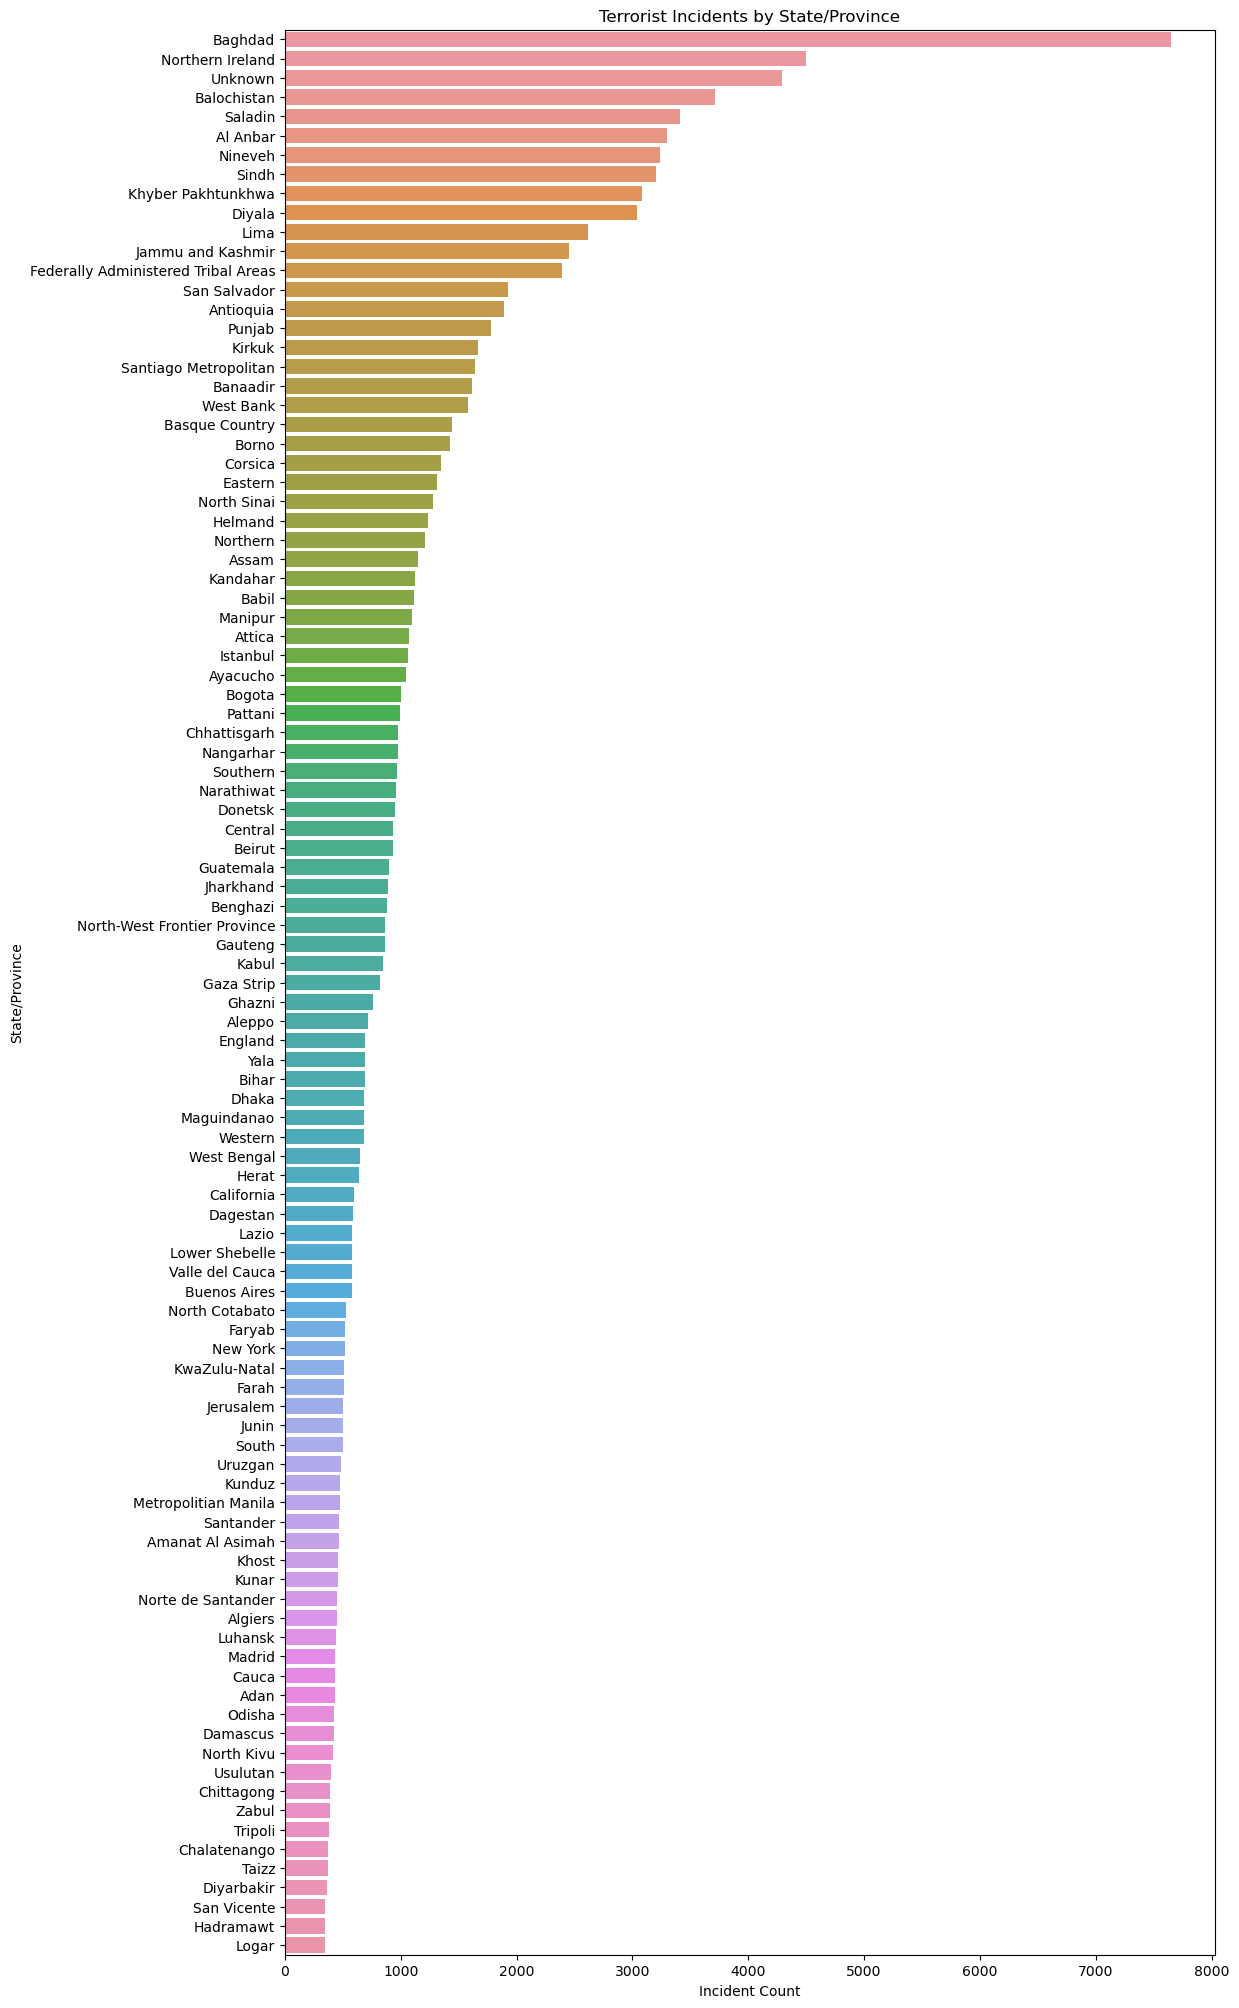

In [49]:
plt.figure(figsize=(12, 25))
state_counts = Terrorism_data['state'].value_counts()[:100]
sns.barplot(x=state_counts.values, y=state_counts.index, orient='h')
plt.title('Terrorist Incidents by State/Province')
plt.xlabel('Incident Count')
plt.ylabel('State/Province')
plt.show()

#### WORDCLOUD

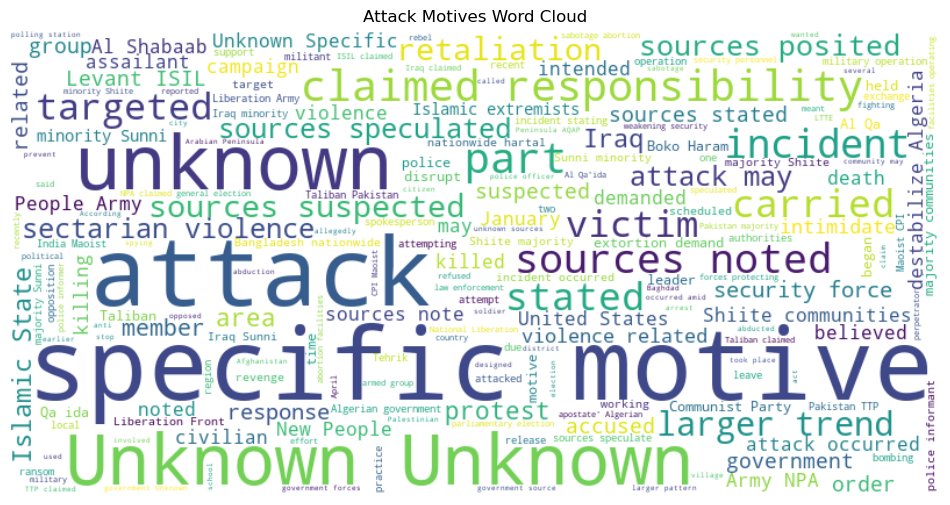

In [53]:
from wordcloud import WordCloud

motive = ' '.join(Terrorism_data['Motive'].dropna().astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(motive)

plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Attack Motives Word Cloud')
plt.axis('off')
plt.show()

 Top 10 cities with the most incidents

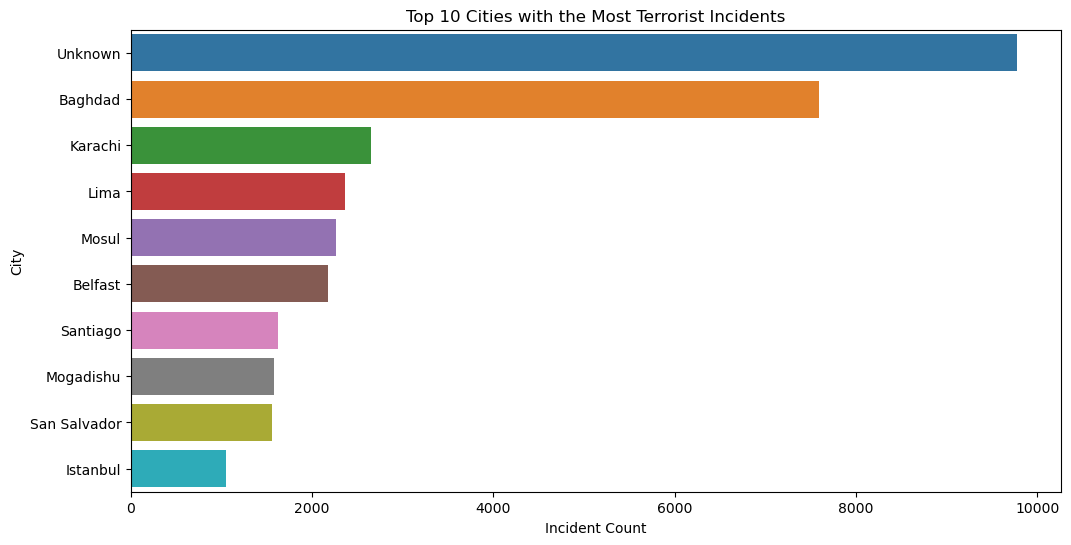

In [45]:
plt.figure(figsize=(12, 6))
top_cities = Terrorism_data['city'].value_counts()[:10]
sns.barplot(x=top_cities.values, y=top_cities.index, orient='h')
plt.title('Top 10 Cities with the Most Terrorist Incidents')
plt.xlabel('Incident Count')
plt.ylabel('City')
plt.show()